In [14]:
%matplotlib inline

In [15]:
import pandas as pd
import seaborn as sb
from sqlalchemy import create_engine
conn = create_engine('sqlite:////Users/brett/Desktop/hierarchy/stats.sqlite')

In [2]:
q = pd.read_sql_table('stats', conn)
q.tail()

,treatment_id,replicate_id,generation,kind,value
2435,1,5,58000,FIT_V,0.000840
2436,1,5,59000,FIT_M,0.994313
2437,1,5,59000,FIT_V,0.000505
2438,1,5,60000,FIT_M,0.993050
2439,1,5,60000,FIT_V,0.000537


In [3]:
q.set_index(['treatment_id', 'replicate_id', 'generation','kind'], inplace=True)

In [4]:
q.tail()

value
treatment_id replicate_id generation kind           
1            5            58000      FIT_V  0.000840
                          59000      FIT_M  0.994313
                                     FIT_V  0.000505
                          60000      FIT_M  0.993050
                                     FIT_V  0.000537

In [34]:
z = pd.read_sql_query('select generation, kind, value from stats where treatment_id = 1 and replicate_id = 5', conn, index_col=['generation', 'kind'])
z.tail()

value
generation kind           
60000      C_3    0.166033
           C_AVE  0.206432
           C_MAX  0.166033
           FIT_M  0.993050
           FIT_V  0.000537

In [35]:
zz = z.unstack(-1)
zz.tail()

value                                                    \
kind             C_0       C_1       C_2       C_3     C_AVE     C_MAX   
generation                                                               
56000       0.001064  0.000973  0.021597  0.161884  0.185518  0.161884   
57000       0.000184  0.000754  0.044945  0.163303  0.209187  0.163303   
58000       0.000085  0.000731  0.028127  0.176164  0.205106  0.176164   
59000       0.000290  0.000209  0.037912  0.163165  0.201577  0.163165   
60000       0.001182  0.000794  0.038422  0.166033  0.206432  0.166033   

                                
kind           FIT_M     FIT_V  
generation                      
56000       0.993021  0.000694  
57000       0.994971  0.000430  
58000       0.992337  0.000840  
59000       0.994313  0.000505  
60000       0.993050  0.000537

In [36]:
zz.columns = zz.columns.levels[1]

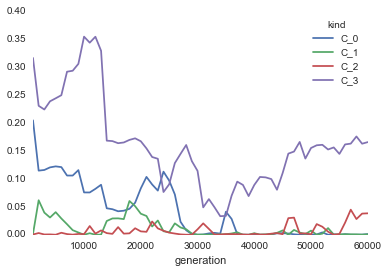

In [37]:
zz.dropna(0).plot(y=['C_%d' % i for i in range(4)])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c050fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10c165250>], dtype=object)

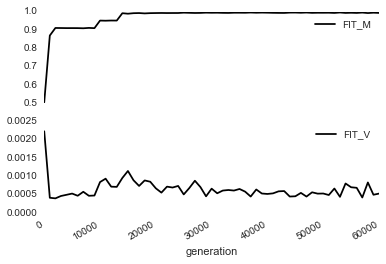

In [38]:
zz.plot(y=["FIT_M", "FIT_V"], subplots=True)

In [11]:
finals = pd.read_sql_query('select name, value from stats s, treatment t where generation=10000 and kind = "FitAve" and s.treatment_id = t.treatment_id', conn)

In [74]:
finals.tail()

,name,value
75,output_4,0.989313
76,output_4,0.988953
77,output_4,0.993756
78,output_4,0.964844
79,output_4,0.985187


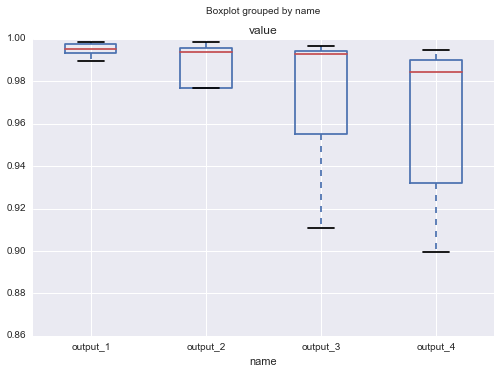

In [75]:
finals.boxplot(column='value',by='name')

In [63]:
finals.groupby('name').count()

,value
name,
output_1,20
output_2,20
output_3,20
output_4,20
